In [1]:
# Experimentation notebook

In [2]:
## Perspective model

In [ ]:
import os
import cv2
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

from src.pipeline.inference import RealTimeInference, RealTimeConfig
from src.model.detect.objdetect import ObjectDetector
from src.model.perspect.field import HomographyPitchDrawer

In [4]:

inference = RealTimeInference()
# inference.run()



![Screenshot](reports/screenshot_2025-03-18.png)


In [ ]:
sobel_x = np.array([
    [ -1,  0,  1],
    [ -2,  0,  2],
    [ -1,  0,  1]
    ])

sobel_y = np.array([
    [ -1, -2, -1],
    [  0,  0,  0],
    [  1,  2,  1]
])

print("Shape of image array:", img_array.shape)
print("Data type:", img_array.dtype)


edges_x = convolve2d(img_array, sobel_x, mode='same', boundary='symm')
edges_y = convolve2d(img_array, sobel_y, mode='same', boundary='symm')

# Compute gradient magnitude
edges = np.sqrt(edges_x**2 + edges_y**2)
edges = (edges / edges.max() * 255).astype(np.uint8)  # Normalize to 0-255

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Sobel)')
plt.axis('off')

plt.show()

In [ ]:

# edge detection

laplacian = np.array([[0,  1, 0],
                      [1, -4, 1],
                      [0,  1, 0]])
edges = convolve2d(img_array, laplacian, mode='same', boundary='symm')



[2025-03-18 16:03:22] INFO - HomographyPitchDrawer initialized.
[2025-03-18 16:03:22] INFO - Pitch drawing completed.
[2025-03-18 16:03:22] INFO - Numpy representation has shape (900, 1600, 3).


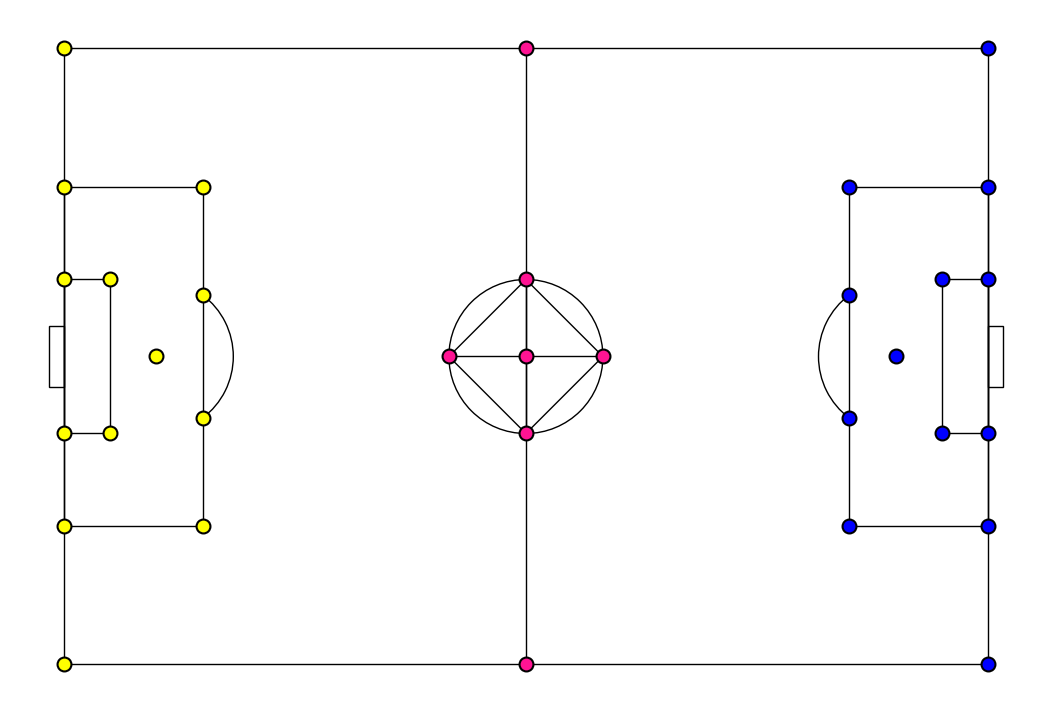

In [ ]:

drawer = HomographyPitchDrawer()

drawer.draw_pitch()

pitch_np = drawer.get_numpy_representation()
